# Brownian motion (Wiener process)
___

A Brownian motion $B(t)$ is a stochastic process satisfying the following four conditions:
1. $B(0) = 0 \,\, a.s.$
1. For any $0 \le s < t$, $B(t) - B(s)$ is normally distributed with mean $0$ and variance $t-s$.
1. $B(t)$ has independent increments.
1. Almost all sample paths of $B(t)$ is continuous.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_formats = {'png', 'retina'}

## sample time equally
Strictly, Brownian motions are not bounded variation.
___

In [4]:
def simple_brownian(step, dim=1):
    nd = np.hstack((np.zeros((dim, 1)), np.random.randn(dim, step-1)))
    motion = np.cumsum(nd, axis=1)
    if dim == 1:
        motion = motion[0]
    return motion

### 1 dimension

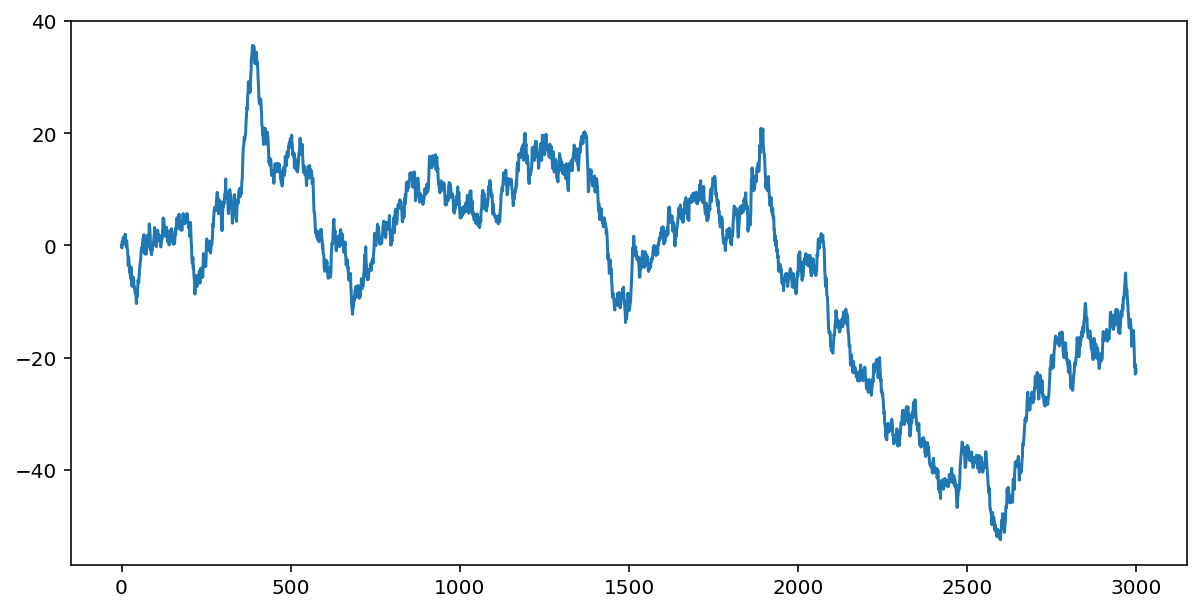

In [3]:
step = 3000

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

x = np.arange(step)
y = simple_brownian(step)

ax.plot(x, y)
plt.show()

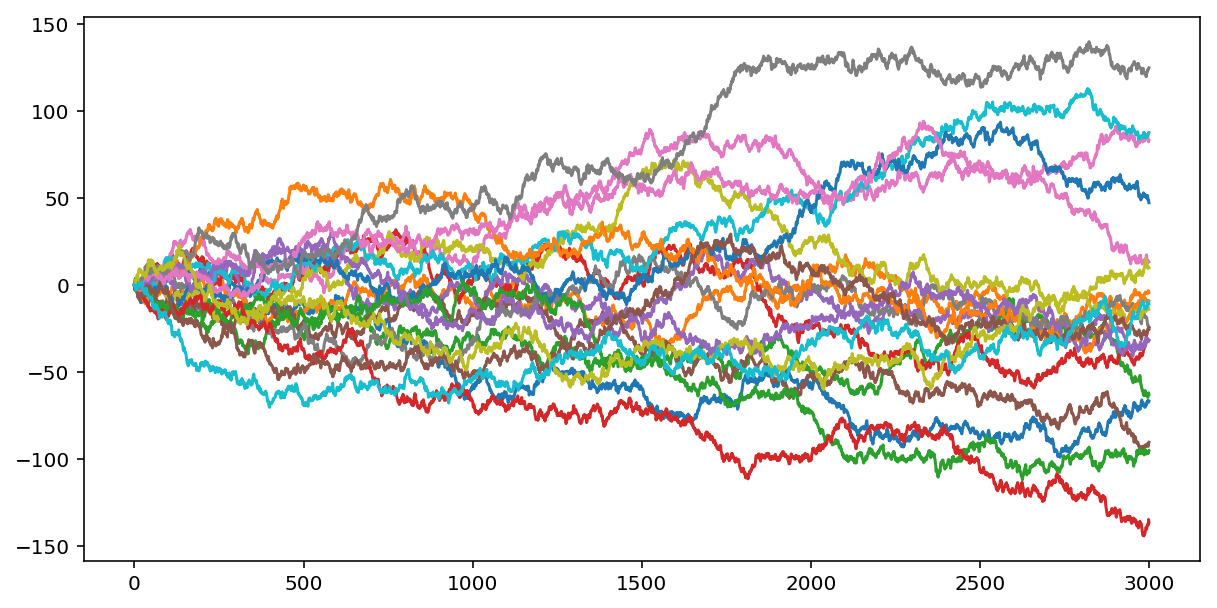

In [4]:
step = 3000
num = 20

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)

x = np.arange(step)
for _ in range(num):
    y = simple_brownian(step)
    ax.plot(x, y)

plt.show()

### 2 dimension

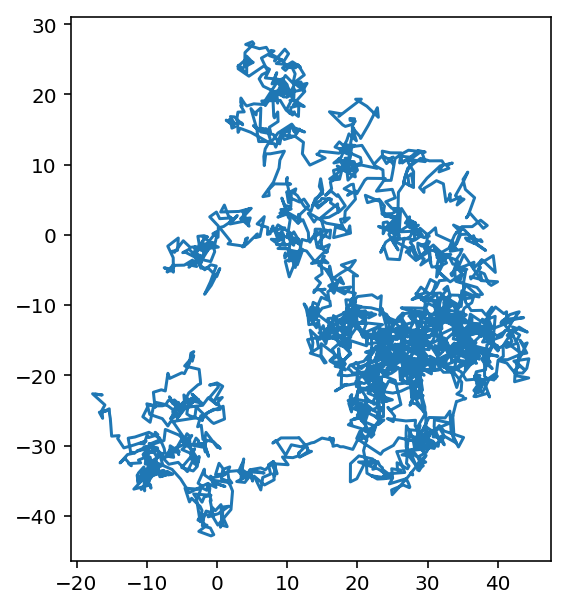

In [5]:
step = 3000
dim = 2

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
plt.gca().set_aspect('equal', adjustable='box') # equalize the scales of x-axis and y-axis

x, y = simple_brownian(step, dim)
ax.plot(x, y)
plt.show()

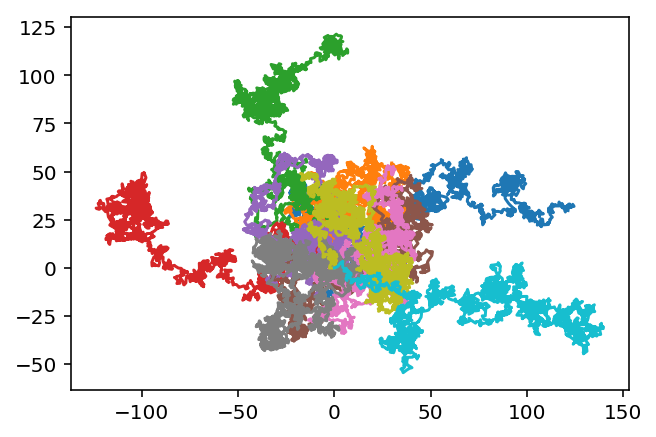

In [6]:
step = 3000
dim = 2
num = 10

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
plt.gca().set_aspect('equal', adjustable='box')

for _ in range(num):
    x, y = simple_brownian(step, dim)
    ax.plot(x, y)

plt.show()

### 3 dimension

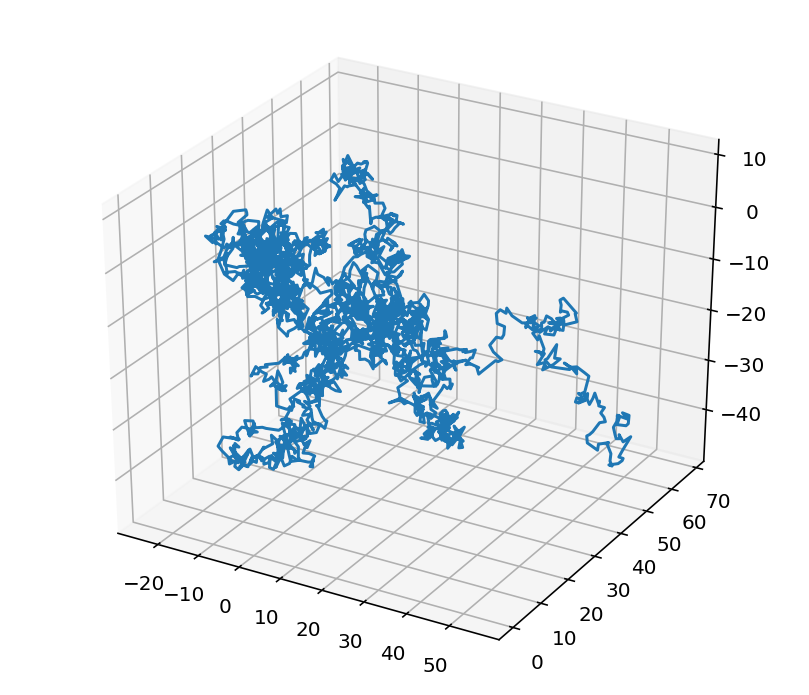

In [10]:
from mpl_toolkits.mplot3d import Axes3D

step = 3000
dim = 3

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
plt.gca().set_aspect('equal', adjustable='box')

x, y, z = simple_brownian(step, dim)
ax.plot(x, y, z)
plt.show()

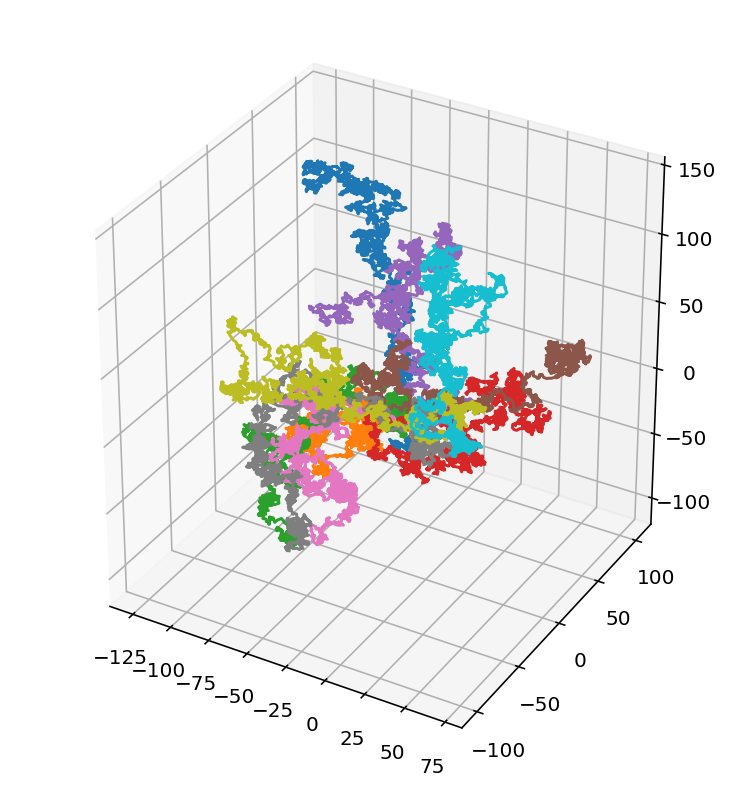

In [9]:
step = 3000
dim = 3
num = 10

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
plt.gca().set_aspect('equal', adjustable='box')

for _ in range(num):
    x, y, z = simple_brownian(step, dim)
    ax.plot(x, y, z)
plt.show()

## Recurrency of Brownian motion
Fact: 1 dimensional Brownian motions have the recursiveness, but 2 or more dimensional Brownian motions don't.
___

### 1 dimension

In [21]:
step = 3000
num = 10000

ys = simple_brownian(step, num)
ys_next = np.hstack((np.zeros((num, 1)), ys))[:, :-1]

products = ys * ys_next
cross_num = np.sum(np.any(products < 0, axis=1))
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 10000
Cross number: 9797
Probability: 0.9797


### 2 dimension

In [10]:
step = 3000
dim = 2
num = 10000

cross_num = 0
for n in range(num):
    nd = np.hstack((np.zeros((dim, 1)), np.random.randn(dim, step-1)))
    motion = np.cumsum(nd, axis=1)
    quatients = motion[:, 2:] / nd[:, 2:]
    n_q = quatients / np.max(quatients, axis=0)
    diff = abs(n_q[0] - n_q[1])
    cross_num += np.any(diff < 1e-5)
prob = cross_num / num
print(f'Trial number: {num}')
print(f'Cross number: {cross_num}')
print(f'Probability: {prob}')

Trial number: 10000
Cross number: 39
Probability: 0.0039


## Arc-sine law of Lévy

**Theorem**  
Let $L_t = \int^t_0 \text{sgn}^+(B(s))\, ds = \int^t_0 1_{\{(B(s)) > 0\}}\, ds $ be the amount of time that a Browinan motion is positive during $[0, t]$. Then,
$$ P(L_t \le \tau)\, = \, \frac{2}{\pi}\arcsin \sqrt{\frac{\tau}{t}}, \,\,\, 0 \le \tau \le t.$$

In [5]:
def positive_time(motion, num):
    if num == 1:
        return np.sum((np.maximum(motion[:-1], 0) - np.maximum(motion[1:], 0)) / (motion[:-1] - motion[1:]))
    else:
        return np.sum((np.maximum(motion[:, :-1], 0) - np.maximum(motion[:, 1:], 0)) / (motion[:, :-1] - motion[:, 1:]), axis=1)
        

,tau,calculation,theory
0,10,0.0201,0.020135
1,100,0.0633,0.063769
2,1000,0.2030,0.204833
3,2000,0.2957,0.295167
4,3000,0.3724,0.369010
5,4000,0.4372,0.435906
6,5000,0.5009,0.500000
7,6000,0.5658,0.564094
8,7000,0.6303,0.630990
9,8000,0.7051,0.704833


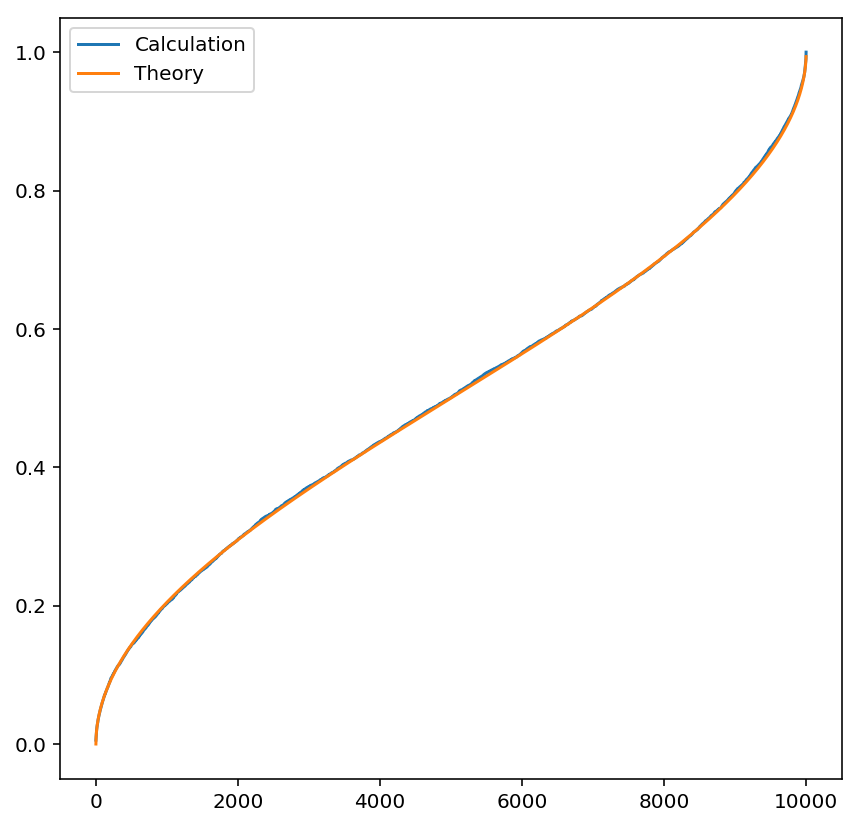

In [6]:
import pandas as pd

step = 10000
num = 10000

taus = np.array([[i] * num for i in [10, 100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]])
sb = simple_brownian(step, num)
ts = positive_time(sb, num)
cal_probs = np.sum(ts <= taus, axis=1) / step
theo_probs = (2 / np.pi) * np.arcsin(np.sqrt(taus[:, 0] / step))
df = pd.DataFrame({'tau': taus[:, 0], 'calculation': cal_probs, 'theory': theo_probs})
display(df)

taus = np.array([[i] * num for i in range(num)])
cal_probs = np.sum(ts <= taus, axis=1) / step
theo_probs = (2 / np.pi) * np.arcsin(np.sqrt(taus[:, 0] / step))


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
ax.plot(taus[:, 0], cal_probs, label='Calculation')
ax.plot(taus[:, 0], theo_probs, label='Theory')
ax.legend()
plt.show()